In [2]:
# Import our customized functions from
import sys
sys.path.insert(0, '/pdFunctions.py')
sys.path.insert(0, '/plots.py')
from pdFunctions import IPD, MIPD, rMIPD, createPlayers
from plots import plot_cunsum, barPlot, plot_box_multiple,plot_two_functions, plot_totals_iterPlayers

# Prisoner's Dilemma

## Abstract
 This project discusses how to implement the popular iterated prisoners dilemma game using python. The implementation aims to  analyze different approaches: normal iterated prisoner dilemma *(IPD)* between two players, prisoner dilemma between multiple players *(MIPD)*, and the repeated multiple players version *(rMIPD)* using additional *gene* as a factor which affects the behavior of the players in each iteration. 
The analysis is illustrated using descriptive plots to represent the data such as: bar plot, box plot and comsum plot.

## Overview
   Prisoners dilemma is a standard example of a game analyzed in game theory that shows why two completely rational individuals might not cooperate, even if it appears that it is in their best interests to do so. It was originally framed by Merrill Flood and Melvin Dresher while working at RAND in 1950. [1]

The structure of two players Prisoner's Dilemma is that the two players are represented by the colors, red and blue, and that each player chooses to either "Cooperate" or "Defect".

If both players cooperate, they both receive the reward R for cooperating. If both players defect, they both receive the punishment payoff P. If Blue defects while Red cooperates, then Blue receives the temptation payoff T, while Red receives the "sucker's" payoff, S. Similarly, if Blue cooperates while Red defects, then Blue receives the sucker's payoff S, while Red receives the temptation payoff T as shown in Figure "1".


<span style="color:blue">Blue</span> - <span style="color:red">Red</span>   | Cooperate | Defect
------------- | -------------| -------------
Cooperate | <span style="color:blue">R</span> - <span style="color:red">R</span> | <span style="color:blue">S</span> - <span style="color:red">T</span>
Defect  | <span style="color:blue">T</span> - <span style="color:red">S</span>  | <span style="color:blue">P</span> - <span style="color:red">P</span>

and to be a prisoner's dilemma game in the strong sense, the following condition must hold for the payoffs:

> T > R > P > S

## Implementation
 A true prisoners dilemma is typically played only once or else it is classified as an iterated prisoners dilemma. In an iterated prisoners dilemma, the players can choose strategies that reward co-operation or punish defection over time. By repeatedly interacting with the same individuals we can even deliberately move from a one-time prisoners dilemma to a repeated prisoners dilemma.

### Strategies
Iterated prisoners dilemma has different *deterministic* and *probabilistic* strategies, and the following are the implemented ones:
+ **Nice guy**: always cooperate.
+ **Bad guy**: always defect.
+ **Main bad**: randomly defect k% of the times and cooperate 100-k%,k<50%
+ **Main nice**: randomly defect k% of the times and cooperate 100-k%, k>50%
+ **Tit for tat (TFT)**: start by cooperating, then repeat what the opponent has done in the previous move.
+ **Tit For Two Tats**: Cooperates on the first move, and defects only when the opponent defects two times.
+ **Suspicious Tit For Tat**: Same as TFT, except that it defects on the first move.
+ **Grudger**: A player starts by cooperating however will defect if at any point the opponent has defected.
+ **Go By Majority**: A player examines the history of the opponent: if the opponent has more defections than cooperations then the player defects.


### Two Players (IPD):
 The IPD game consists of two players where each player has an assigned strategy in order to cooperate or defect in the game.
 The implemented *IPD* function as follows:
```
IPD(player1, player2, turns=1)
```
**Function Parameters:** 
1. *palyer1:* the first player.
2. *player2:* the second player.
3. *turns:* the number of turns.

**Function Returns:**
- Matrix of the score of each player in each turn.

### Multiple Players IPD 
The *MIPD* consists of multiple players where each player has an assigned strategy not necessarily different ones.
The implemented *MIPD* function follows the **Round-Robin** scheme, where each player plays once against the others whithin a number of iterations.

```
MIPD(players, turns=1, mode=1)
```

**Function Parameters:** 
1. *palyers:* the array of players.
2. *turns:* number of turns.
3. *mode:* 1 or 0; controls the output values
	0; output = The score of each player in each turn.
	1; output = The total score of each palyer for his matches with other players.

### Repeated Multiple Players IPD 
The **rMIPD** is a repeated MIPD where it has different approches, the static population is choosed which means the number of players is fixed. while the strategies are allowed to mutate. A parameter *(gene)* encodes the attidue of an individual to cooperate, such gene can mutate randomly and the corresponding phenotype should compete in the MPIPD such that the best-fitted is determined.

```
rMIPD(players, turns=1,iters=1, alfa=0.5)
```

**Function Parameters:** 
1. *players:* list of objects of type Player
2. *turns:* number of turns of each match between two players
3. *iters:* number of iterations
4. *alfa:* the probabilty for a player to mutate,
    eg. alfa = 1, removes its effect; all players will change their strategies in each iteration.
    alfa = -1, alfa will be calculated for each strategy according to it's scores.

**Function Returns:**
1. *iterPlayers:* 2D array of Player objects for the number of iterations and the number of players
2. *iterScores:* 2D array for the total scores of each player in one iteration
3. *totals:* array of the total score of all players in one iteration.

## Analysis
#### IPD
Using the IPD function, the different strategies are compared two at a time where each player has a pre-selected strategy.


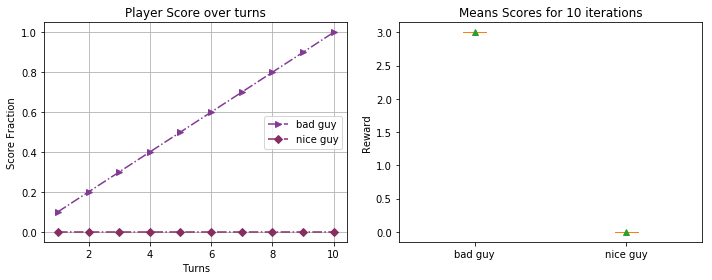

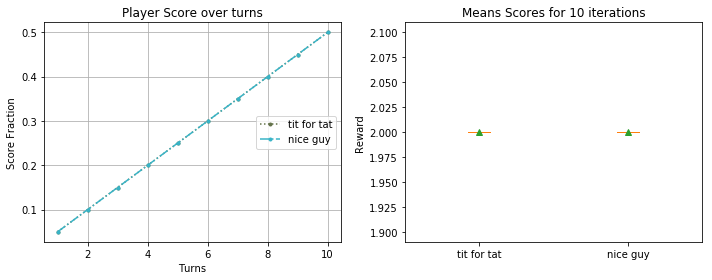

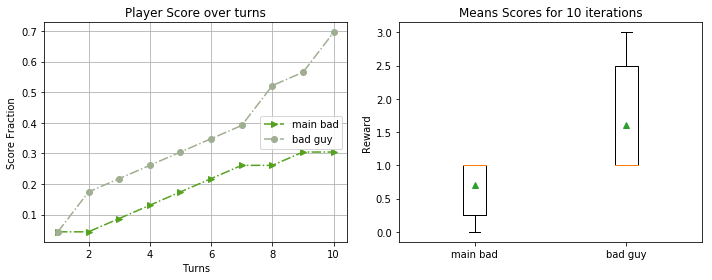

In [3]:
players = createPlayers( [['tit for tat', 1], ['main bad', 1],['main nice', 1],['bad guy', 1],['nice guy', 1] ], shuffle=False)
plot_two_functions(IPD(players[3], players[4],10),[players[3], players[4]], 10)

plot_two_functions(IPD(players[0], players[4],10),[players[0], players[4]], 10)

plot_two_functions(IPD(players[1], players[3],10),[players[1], players[3]], 10)

From the results in the above plots, we find that the **bad guy** stragey reaches the best score or even at least same as the opponent, while the **nice guy** strategy lose most of the time.

#### MIPD
Using the MIPD function, the different strategies are compared as mupltiple players where each player has a pre-selected strategy.


In [4]:
players_bar = createPlayers([['nice guy',5],['bad guy',5], ['main bad',5],['main nice',5],['tit for tat',5], ['go by majority',5], ['tit for 2 tats',5], ['grudger',5]], False)
scores= MIPD(players_bar,10,mode = 0)

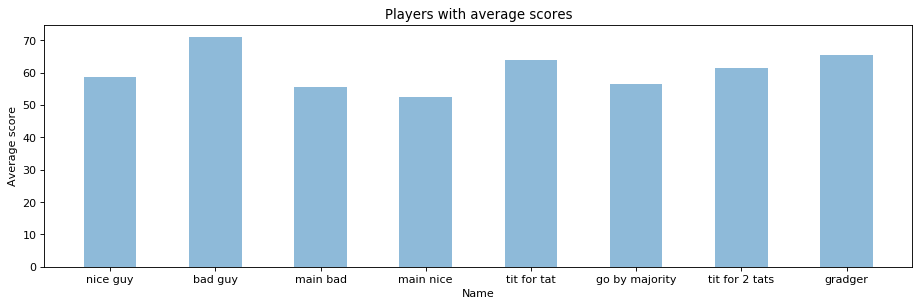

In [5]:
barPlot(players_bar,scores)

The figure above compares the average scores for 40 players, 5 for each strategy, and as represented, we can find that the players with strategy **bad guy** have the highset average score among the others, followed by tit for tat, gradger and tit for 2 tat. Also we notice that the players with strategy **nice guy** have the lowest averge scores compared to all other players.


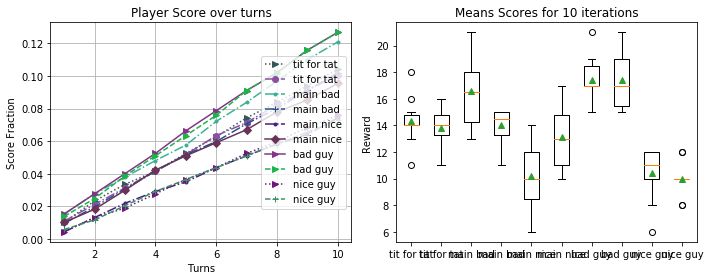

In [9]:
plot_two_functions(MIPD(players,10,mode=0),players, 10)

As shown from the figure above, when using 5 players over ten interations, **bad guy** strategy also reaches the highest scores while the **nice guy** strategy has the lowest, which is same as **IPD**.

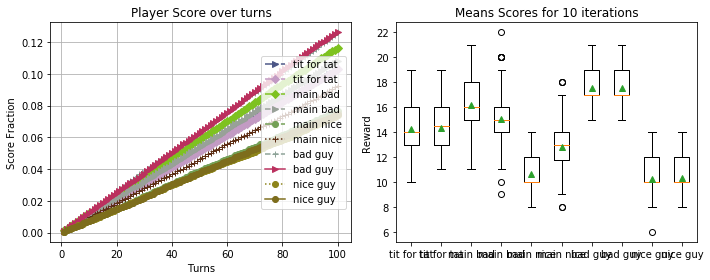

In [8]:
players = createPlayers( [['tit for tat', 2], ['main bad', 2],['main nice', 2],['bad guy', 2],['nice guy', 2] ], shuffle=False)
plot_two_functions(MIPD(players,100,mode=0),players, 100)

As shown in the previous figure, when using 10 players over one hundred interations, players with **bad guy** strategies reache the highest scores while the players of **nice guy** strategies have the lowest, which is same as the previous **MIPD** example.

#### Repeated multiple players iterated prisoners dilemma (rMIPD)
Basically this method iterates **MIPD** for several iterations, each iteration represents new generation which has new strategy distribution depending on their scores in previous generation(iteration).
The population used to analyze this function is as follows:
10 **nice guy**, 10 **bad guy** and 10 **main bad** players.

In [20]:
players = createPlayers([['nice guy', 10], ['bad guy', 10], ['main bad', 10]])

Then we run the rMIPD function with turns = 10 and iterations = 15

In [21]:
iterPlayers, iterScores, totals = rMIPD(players,10,15,1)

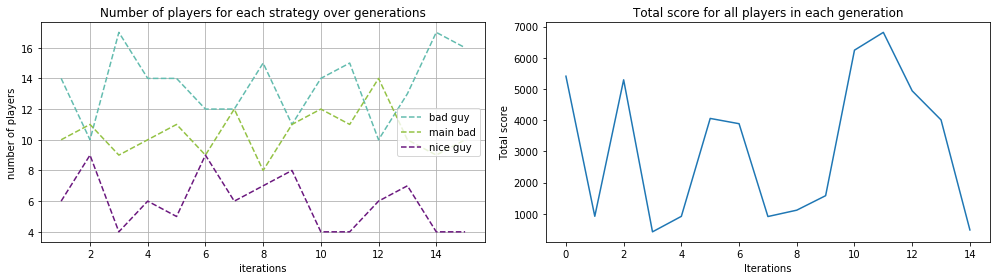

In [24]:
plot_totals_iterPlayers(totals, iterPlayers)

In the previous plots we notice that the overall behaviour of the population is tend to be random, the reason for that is that for each new iteration a whole new population is generated without taking into acount the previous strategy distribution, hence to enhance the simulation, a **gene(alfa)** is added to be the probabilty of a player to change his strategy in the next iteration.
In this experiment we will start by setting alfa = 0.5, which means each player will change his strategy by 50% probability. 

In [35]:
iterPlayers2, iterScores2, totals2 = rMIPD(players,10,15,alfa=0.5)

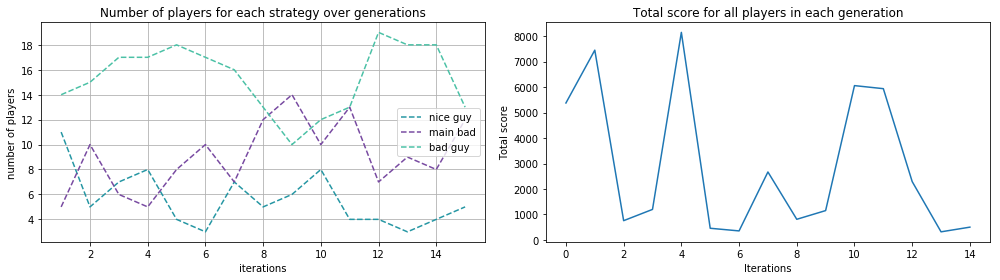

In [36]:
plot_totals_iterPlayers(totals2, iterPlayers2)

The plots illustrates how the bad guy strategy is dominating and increasing in numbers in each iteration. However, the graphs are not yet stable and there is a random behavior which is clear in **main bad** and **nice guy** curvs, also the total score plot shows how the total score of the community is decreasing but with some sparks in values between generations.
The sparks in total values and the randomness in the number of players are results of having the a fixed alfa value for all strategys in all iterations. So even if a strategy is winning, the player will change his strategy with the same probabilty as the loser one.

**Adaptive alfa** is the third mode of this function, where each strategy has a different alfa according to it's relative score in the previous iteration.
to activate this mode we set alfa to -1

In [37]:
iterPlayers3, iterScores3, totals3 = rMIPD(players,10,15,alfa=-1)

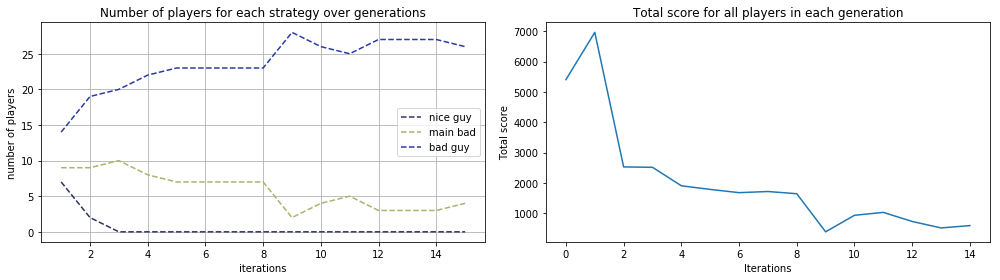

In [38]:
plot_totals_iterPlayers(totals3, iterPlayers3)

Now, the results are more clear and informative which shows how the number of players using **nice guy** strategy is decreased to zero in the 3rd iteration, also it is clear that the **bad guy** strategy after a few generations occupies most of the population.

In [6]:
players2 = createPlayers([['nice guy', 20], ['bad guy', 20], ['main bad', 20], ['main nice', 20], ['tit for tat', 20]])

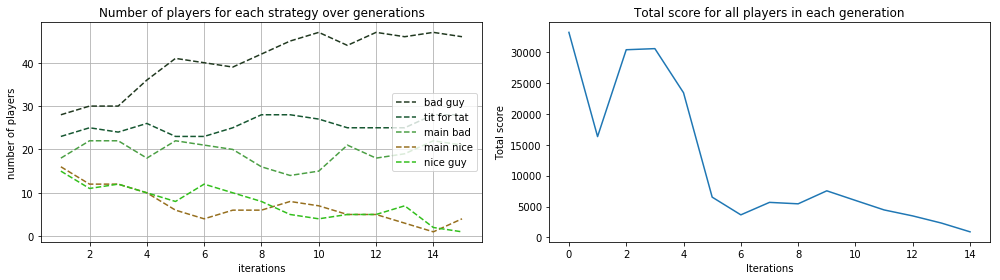

In [18]:
iterPlayers4, iterScores4, totals4 = rMIPD(players2,10,15,alfa=-1)
plot_totals_iterPlayers(totals4, iterPlayers4)

## Conclusion

- From the previous analysis, for both IPD and MIPD the players with **bad guy** strategy gain the highest scores while the players with **nice guy** strategy has the lowest scores, which means that players who defect gain more then players who cooperate.
- In case of having large number of players of different strategies that represent a community, the more realistic the simulation the more the individials mutate their strategies to increase their idividial scores, which leads the total score of the whole community to decrease as the portion of "bad guys" is increasing. Furthermore, in most cases the total score of the community over generations shows a large spark in value which can be used to detect the best commnunity distribution that maximizes the total scores of the community. This optimaized strategy distribution also has a high number of "bad guys" as can be seen in the 3rd iteration in the previous graphs.

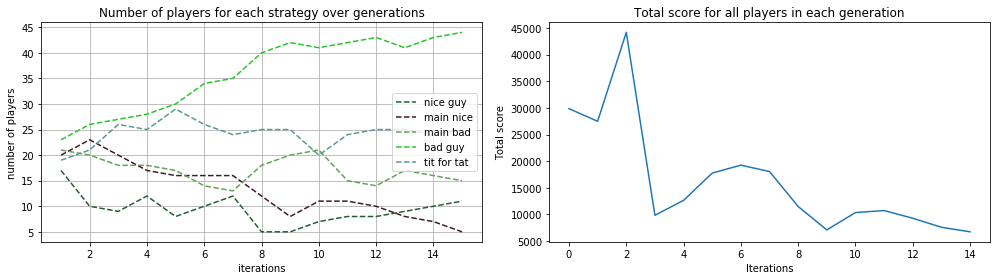

In [6]:
players3 = createPlayers([['nice guy', 20], ['bad guy', 20], ['main bad', 20], ['main nice', 20], ['tit for tat', 20]])
iterPlayers4, iterScores4, totals4 = rMIPD(players3,10,15,alfa=-1)
plot_totals_iterPlayers(totals4, iterPlayers4)